<a href="https://colab.research.google.com/github/Himanshucode77/Case_Study/blob/main/Netflix_CS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**
Analyze the Netflix data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries.

We can start with observation of the data, missing value detection & statistical summary to get some broader insights from the features.
Do some preprocessing, remove null values and do some Non-Graphical Analysis (i.e. Value counts and unique attributes) & Visual Analysis (i.e. Univariate, Bivariate)



# Read Netflix data & import libraries 

In [ ]:
import math
import random
import numpy as np
import pandas as pd

# !pip install matplotlib==3.5
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

from datetime import datetime

In [ ]:
data = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv")

In [ ]:
data_to_explore = data.drop(["show_id", "description"], axis = 1)

# Observations on the shape of data, data types of all the attributes


In [ ]:
data_to_explore.shape

(8807, 10)

In [ ]:
data_to_explore.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


# Missing value detection

In [ ]:
data_to_explore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
dtypes: int64(1), object(9)
memory usage: 688.2+ KB


## Conversion of Categorical attributes

In [ ]:
data_to_explore["release_year"] = data_to_explore["release_year"].astype('object')

In [ ]:
data_to_explore["date_added"] = pd.to_datetime(data_to_explore["date_added"])

# Statistical summary of dataset.

In [ ]:
data_to_explore.describe(include="O")

,type,title,director,cast,country,release_year,rating,duration,listed_in
count,8807,8807,6173,7982,7976,8807,8803,8804,8807
unique,2,8807,4528,7692,748,74,17,220,514
top,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,2018,TV-MA,1 Season,"Dramas, International Movies"
freq,6131,1,19,19,2818,1147,3207,1793,362





***Created function for computing percentage of missing values and Unnesting the dataframe column wise.*** 

In [ ]:
def missing_values(dataframe):
  missing_value_count = dataframe.isnull().sum()
  missing_value_percent = 100 * dataframe.isnull().sum() / len(dataframe)
  table = pd.concat([missing_value_count, missing_value_percent], axis=1)
  table = table.rename(columns = {0 : '# of NA', 1 : '% of NA'})
  table = table.sort_values('% of NA', ascending = False).round(3)
  return table

def unnest(dataframe, column_names):
  df = dataframe[column_names]
  df[column_names[1]] = df[column_names[1]].apply(lambda value: value if(type(value) is float) else value.split(", "))
  df = df.explode(column_names[1])
  df[column_names[1]] = df[column_names[1]].str.replace(",", "")
  return df 

In [ ]:
missing_values(data_to_explore)

,# of NA,% of NA
director,2634,29.908
country,831,9.436
cast,825,9.368
date_added,10,0.114
rating,4,0.045
duration,3,0.034
type,0,0.000
title,0,0.000
release_year,0,0.000
listed_in,0,0.000




***Created function to do bi-variate analysis with count plot and bar plot.***

In [ ]:
def countplot(data, x, hue = None, order = None, size = None, rotation = None, label = None):
  rotation = 90 if rotation else 0
  if (size): plt.figure(figsize = size)
  g = sns.countplot(data = data, x = x, order = order, hue = hue)
  for i in g.containers:
    g.bar_label(i, rotation = rotation)
  if (hue): plt.legend(loc='upper right')
  plt.xticks(rotation = rotation)
  if (label):
    g.set_xlabel(label[0])
    g.set_ylabel(label[1])
  plt.show()

def barplot(data, x, y, size = None, rotation = None, hue = None, label = None):
  rotation = 90 if rotation else 0
  if (size): plt.figure(figsize = size)
  g = sns.barplot(data = data, x = x, y = y, hue = hue)
  for i in g.containers:
    g.bar_label(i, rotation = rotation)
  if (hue): plt.legend(loc='upper right')  
  plt.xticks(rotation = rotation)
  if (label):
    g.set_xlabel(label[0])
    g.set_ylabel(label[1])
  plt.show()

**Unnesting *date_added* column into new columns  *added_year*,   *added_month*.  &.  *added_day*.**

In [ ]:
day, month, year = 28, int(data_to_explore["date_added"].dt.month.mode()[0]), int(data_to_explore["date_added"].dt.year.mode()[0])
for index in data_to_explore[data_to_explore["date_added"].isna()].index:
  data_to_explore.loc[index, "date_added"] = datetime(max(year, data_to_explore.loc[index, "release_year"]), month, day)
data_to_explore["added_year"] = pd.DatetimeIndex(data_to_explore["date_added"]).year
data_to_explore["added_month"] = pd.DatetimeIndex(data_to_explore["date_added"]).month_name()
data_to_explore["added_day"] = pd.DatetimeIndex(data_to_explore["date_added"]).day_name()
data_to_explore.drop(["date_added"], axis = 1, inplace = True)

# Non-Graphical Analysis: Value counts and unique attributes

**Type**

In [ ]:
data_to_explore["type"].unique()

array(['Movie', 'TV Show'], dtype=object)

In [ ]:
data_to_explore["type"].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

**Country**

In [ ]:
data_to_explore["country"].value_counts()

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

**Rating**

In [ ]:
data_to_explore["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
data_to_explore["rating"].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

**Duration**

In [ ]:
data_to_explore["duration"].value_counts()

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: duration, Length: 220, dtype: int64

**Release year**

In [ ]:
data_to_explore["release_year"].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943], dtype=object)

In [ ]:
data_to_explore["release_year"].value_counts()

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

# Data Pre-processing

In [ ]:
type_movie = data_to_explore["type"] == "Movie"
type_show = data_to_explore["type"] == "TV Show"

**Duration imputation**

In [ ]:
data = data_to_explore[["type", "duration"]]
for text in [" min", " Seasons", " Season"]: data["duration"] = data["duration"].str.replace(text, "")
data.loc[type_movie, "duration"] = data.loc[type_movie, "duration"].fillna(value = data.loc[type_movie, "duration"].median())
data.loc[type_show, "duration"] = data.loc[type_show, "duration"].fillna(value = data.loc[type_show, "duration"].median())
data_to_explore["duration"] = data["duration"].astype("int")

**Rating imputation**

In [ ]:
most_freq_rating = data_to_explore["rating"].mode()[0]
data_to_explore["rating"].fillna(value = most_freq_rating, inplace = True)
data_to_explore.loc[data_to_explore["rating"].isin(["74 min", "66 min", "84 min"]) , "rating"] = most_freq_rating

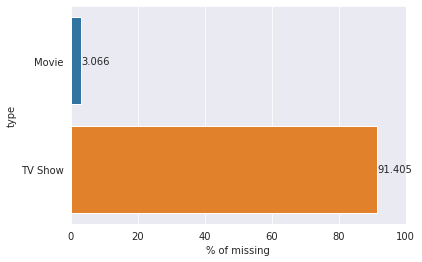

In [ ]:
g = sns.barplot(x='% of missing', y='type', data=pd.DataFrame({ 'type': ['Movie', 'TV Show'], '% of missing':[ round(len(data_to_explore[(data_to_explore["director"].isna() & (type_movie))]) / len(data_to_explore[type_movie]) * 100, 3), round(len(data_to_explore[(data_to_explore["director"].isna() & (type_show))]) / len(data_to_explore[type_show]) * 100, 3) ] }), orient='h')
g.set(xlim=(0, 100))
for i in g.containers:
  g.bar_label(i, )
plt.show()

**Handling the missing data of "country" and "cast" features.**

In [ ]:
def handle_missing(data, fdata, sdata, tdata, flabel, slabel, tlabel):
  primary = fdata.merge(sdata).groupby([flabel, slabel]).agg(items = (slabel, "count")).sort_values(by = "items", ascending = False).reset_index()
  secondary = sdata.merge(tdata).groupby([tlabel, slabel]).agg(items = (tlabel, "count")).sort_values(by = "items", ascending = False).reset_index()
  for index in data[data[slabel].isna()].index:
    casts_1 = primary[primary[flabel] == data.loc[index, flabel]]
    casts_2 = secondary[secondary[tlabel] == data.loc[index, tlabel]]
    casts = casts_1.merge(casts_2)
    if (len(casts)): data.loc[index, slabel] = casts.iloc[random.randint(0, len(casts) - 1)][slabel]
    elif (len(casts_1)): data.loc[index, slabel] = casts_1.iloc[random.randint(0, len(casts_1) - 1)][slabel]
    elif (len(casts_2)): data.loc[index, slabel] = casts_2.iloc[random.randint(0, len(casts_2) - 1)][slabel]
    else: data.loc[index, slabel] = "Unknown"

In [ ]:
data_to_explore.drop(data_to_explore[((type_movie) & (data_to_explore["director"].isna()))].index, inplace = True)

**Unnesting the data & Handling the missing values**

In [ ]:
title_with_cast = unnest(data_to_explore, ["title", "cast"])
title_with_genre = unnest(data_to_explore, ["title", "listed_in"])
title_with_country = unnest(data_to_explore, ["title", "country"])
title_with_director = unnest(data_to_explore, ["title", "director"])
data = title_with_director.merge(title_with_cast).merge(title_with_country)

In [ ]:
handle_missing(data, title_with_director, title_with_country, title_with_cast, "director", "country", "cast")
corrected_country = data.groupby(["title"])[["country"]].agg(country  = ('country', lambda x: x.value_counts().index[0])).reset_index()
data = data.merge(corrected_country, left_on="title", right_on="title").drop("country_x", axis = 1).rename(columns = { "country_y": "country" })
handle_missing(data, title_with_director, title_with_cast, title_with_country, "director", "cast", "country")

In [ ]:
def drop_unwanted(data, label):
  res = data[["title", label]].drop_duplicates()
  return res.drop(res[res[label] == "Unknown"].index)

In [ ]:
unnested_title_director_cast_country = data
title_with_cast = drop_unwanted(data, "cast")
title_with_country = drop_unwanted(data, "country")
title_with_director = drop_unwanted(data, "director")

# Outlier check

In [ ]:
movie_duration = data_to_explore[data_to_explore["type"] == "Movie"]["duration"]
movie_duration.describe()

count    5943.000000
mean      100.582534
std        27.306633
min         3.000000
25%        88.000000
50%        99.000000
75%       115.000000
max       253.000000
Name: duration, dtype: float64

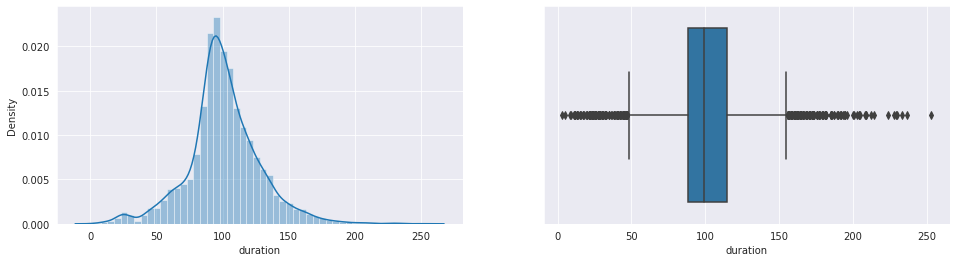

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.distplot(movie_duration, ax=axes[0])
sns.boxplot(movie_duration, ax=axes[1])
plt.show()

In [ ]:
show_duration = data_to_explore[data_to_explore["type"] == "TV Show"]["duration"]
show_duration.describe()

count    2676.000000
mean        1.764948
std         1.582752
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        17.000000
Name: duration, dtype: float64

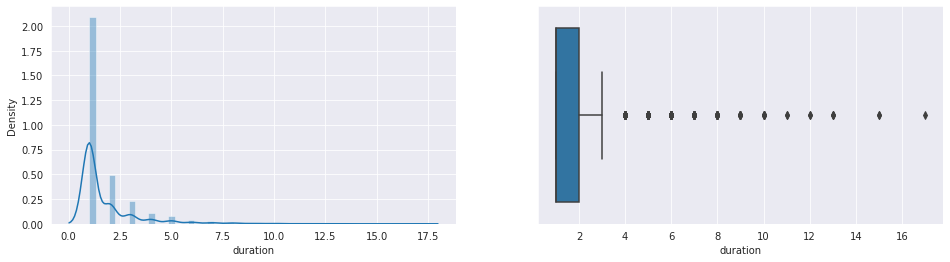

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.distplot(show_duration, ax=axes[0])
sns.boxplot(show_duration, ax=axes[1])
plt.show()

# Visual Analysis - Univariate 

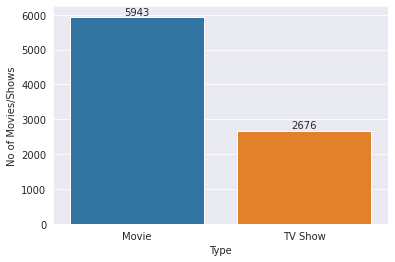

In [ ]:
countplot(data = data_to_explore, x = "type", order = data_to_explore["type"].value_counts().index, label = ("Type", "No of Movies/Shows"))

Above Plot clearly shows that in two 'type' data, Number of movies are more than double in comparison to TV show. 

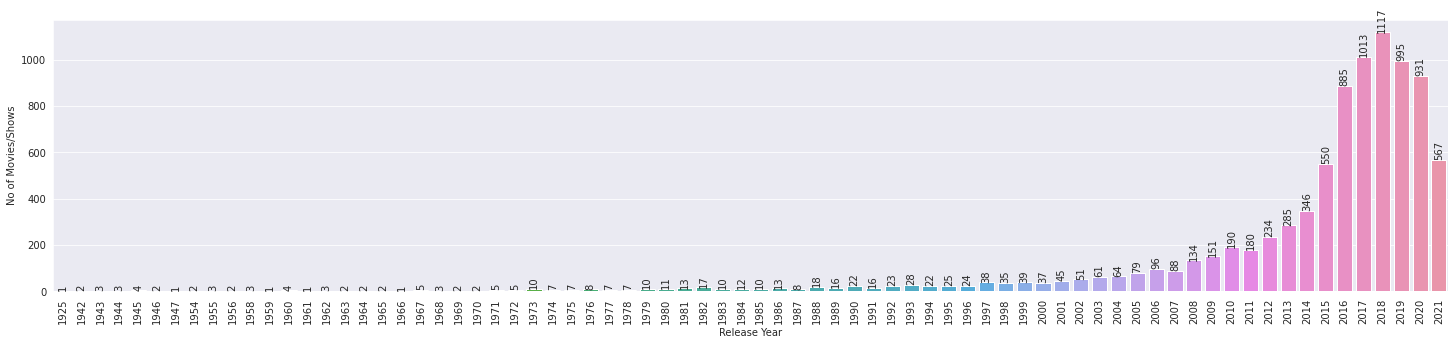

In [ ]:
countplot(data = data_to_explore, x = "release_year", size = (25, 5), rotation = True, label = ("Release Year", "No of Movies/Shows"))

Above plot shows the 'release_year' of Movies & TV_shows over the years and most of the data fall under year 2015 to 2021. In Year 2018, Netflix saw highest release.

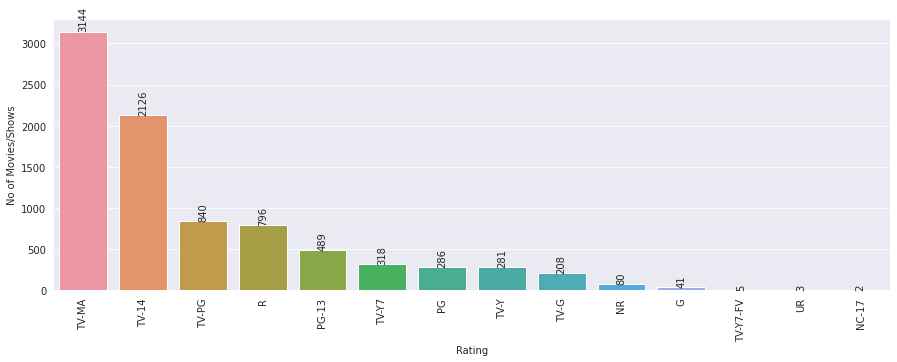

In [ ]:
countplot(data = data_to_explore, x = "rating", order = data_to_explore["rating"].value_counts().index, size = (15, 5), rotation = True, label = ("Rating", "No of Movies/Shows"))

Above 'Rating' plot clearly shows that 'TV-MA' rated content is highest on the platform. 

In [ ]:
top_cast_movie = data_to_explore.loc[data_to_explore["type"] == "Movie", ["type", "title"]].merge(title_with_cast).groupby(["type", "cast"]).agg(count = ("title", "count")).reset_index().sort_values(by = "count", ascending = False)[:10].merge(title_with_cast)
top_cast_show = data_to_explore.loc[data_to_explore["type"] == "TV Show", ["type", "title"]].merge(title_with_cast).groupby(["type", "cast"]).agg(count = ("title", "count")).reset_index().sort_values(by = "count", ascending = False)[:10].merge(title_with_cast)

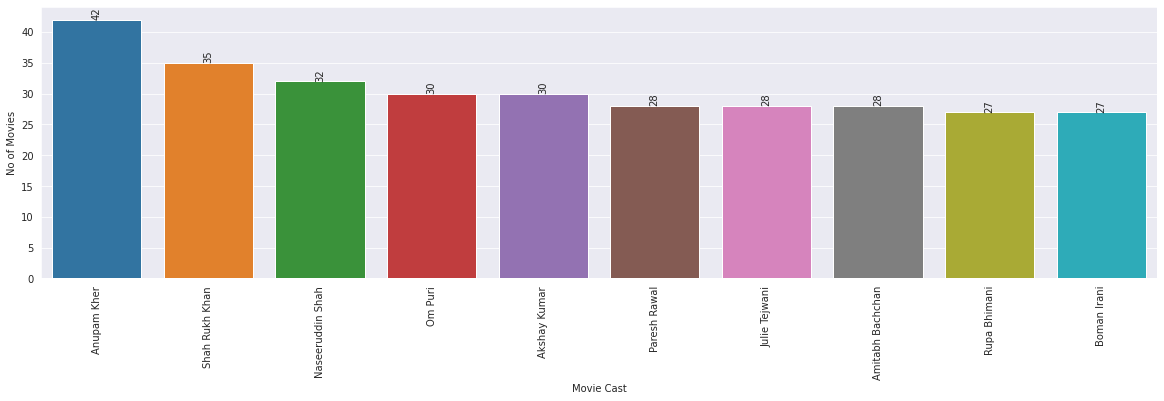

In [ ]:
barplot(data = top_cast_movie, x = "cast", y = "count", size = (20, 5), rotation = True, label = ("Movie Cast", "No of Movies"))

Above 'cast' plot shows Top 10 cast, who acted in all the different movies. 'Anupam Kher' leading the list while SRK is on 2nd position.

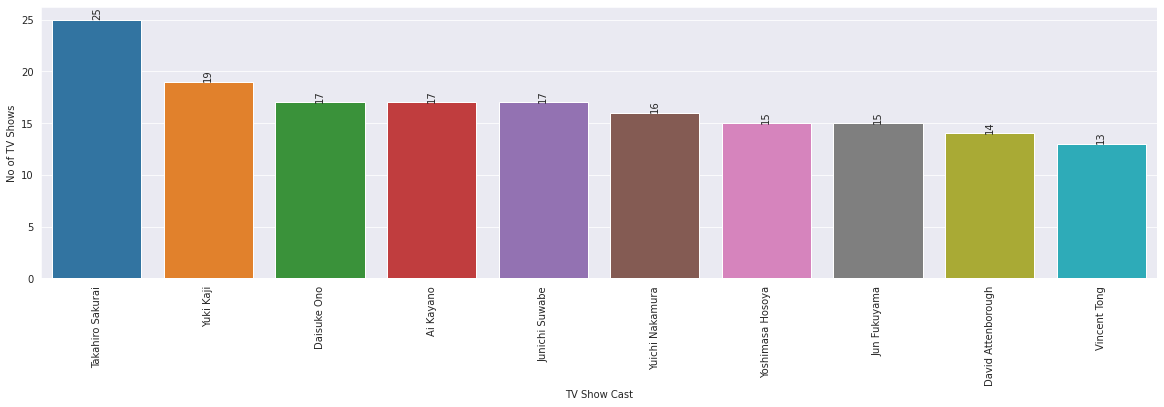

In [ ]:
barplot(data = top_cast_show, x = "cast", y = "count", size = (20, 5), rotation = True, label = ("TV Show Cast", "No of TV Shows"))

Above 'cast' plot shows Top 10 cast, who acted in all the different TV shows. 'Takahiro Sakurai' leading the list while 'Yuki Kaji' is on 2nd position.

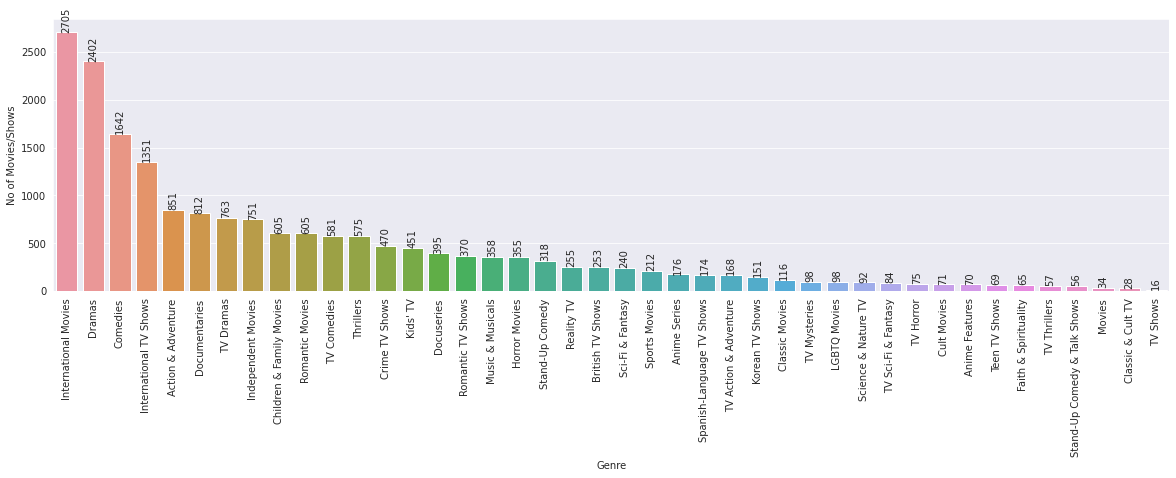

In [ ]:
barplot(data = title_with_genre["listed_in"].value_counts()[:50].to_frame().reset_index(), x = "index", y = "listed_in", size = (20, 5), rotation = True, label = ("Genre", "No of Movies/Shows"))

Above 'Genre' plot shows the top 50 most popular genre on the platform. 'International movies', 'Dramas', 'Comedies' are number 1,2,3 respectively. Next in line are Action &Adventure, Documentaries, TV drama, Children &Family Movies. 

In [ ]:
top_country_movie = data_to_explore.loc[data_to_explore["type"] == "Movie", ["type", "title"]].merge(title_with_country).groupby(["type", "country"]).agg(count = ("title", "count")).reset_index().sort_values(by = "count", ascending = False)[:10].merge(title_with_country)
top_country_show = data_to_explore.loc[data_to_explore["type"] == "TV Show", ["type", "title"]].merge(title_with_country).groupby(["type", "country"]).agg(count = ("title", "count")).reset_index().sort_values(by = "count", ascending = False)[:10].merge(title_with_country)

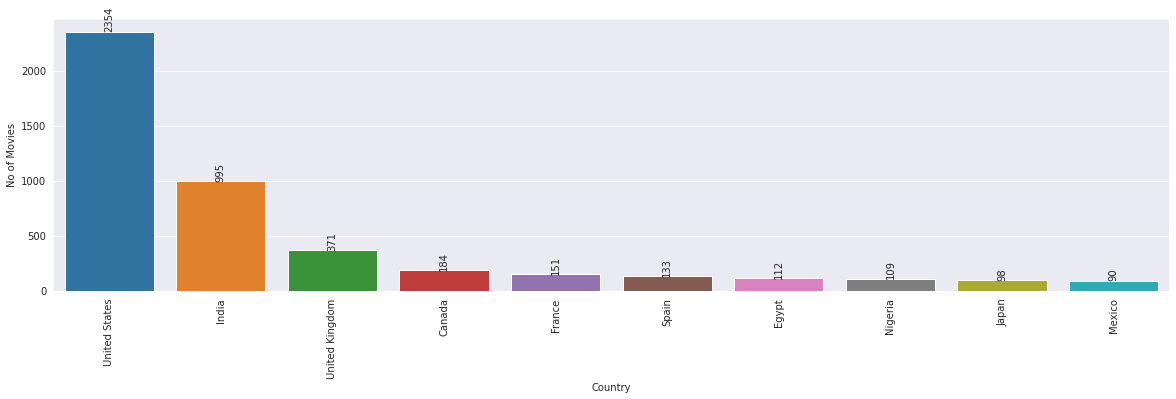

In [ ]:
barplot(data = top_country_movie, x = "country", y = "count", size = (20, 5), rotation = True, label = ("Country", "No of Movies"))

Above Plot shows USA & INDIA are two major countries who are leading the chart in terms of movies produced.

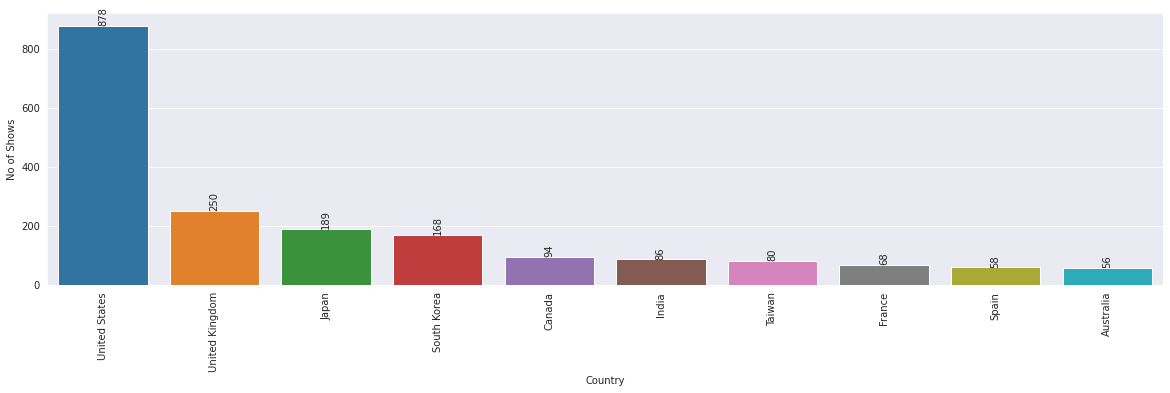

In [ ]:
barplot(data = top_country_show, x = "country", y = "count", size = (20, 5), rotation = True, label = ("Country", "No of Shows"))

Above Plot shows USA & UK are two major countries who are leading the chart in terms of TV Shows produced.

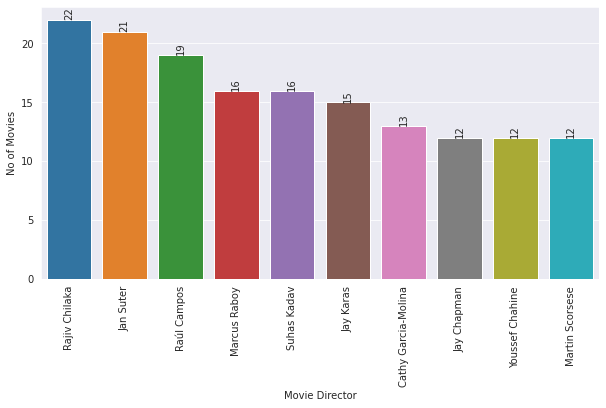

In [ ]:
top_directors = title_with_director["director"].value_counts()[:10].to_frame().reset_index().rename(columns = { "index": "director", "director": "count" }).merge(title_with_director)
barplot(data = top_directors, x = "director", y = "count", size = (10, 5), rotation = True, label = ("Movie Director", "No of Movies"))

Above Plot shows Top 10 Directors who have directed most number of movies.

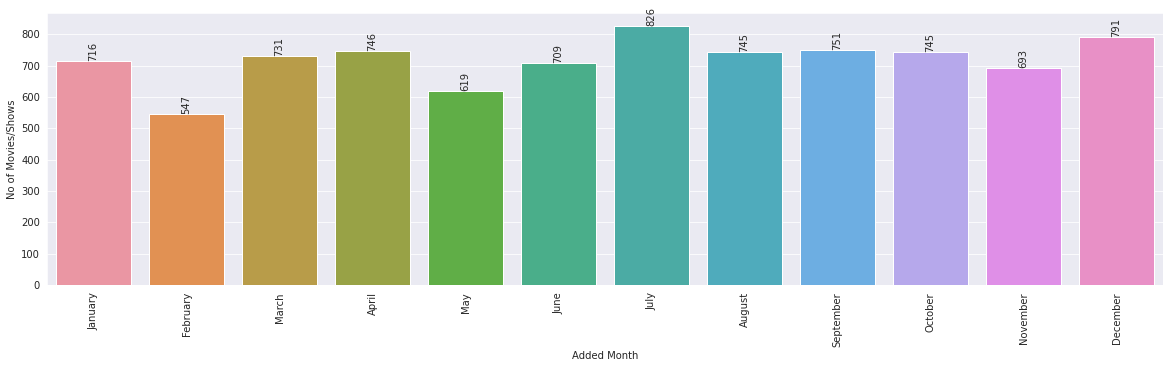

In [ ]:
countplot(data = data_to_explore, x = "added_month", size = (20, 5), rotation = True, order=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], label = ("Added Month", "No of Movies/Shows"))

Above Plot shows in which month of the year how much content was added. July and December are months when most of the content was added while in February month the least content was added. 

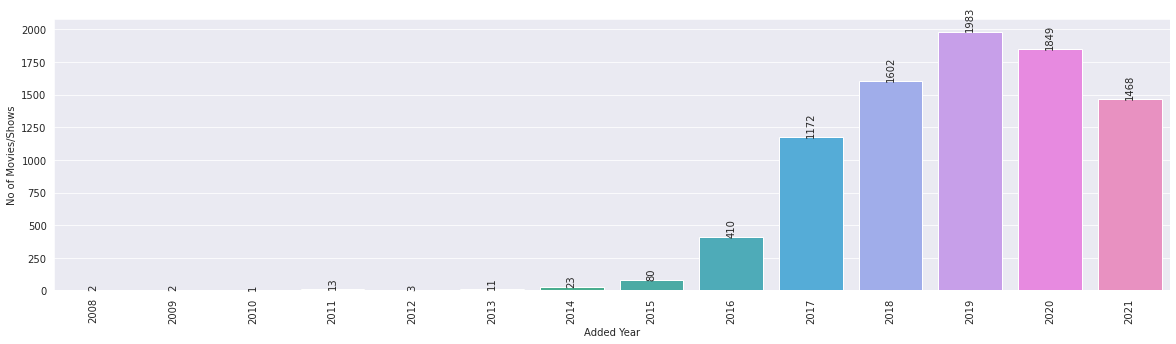

In [ ]:
countplot(data = data_to_explore, x = "added_year", size = (20, 5), rotation = True, label = ("Added Year", "No of Movies/Shows"))

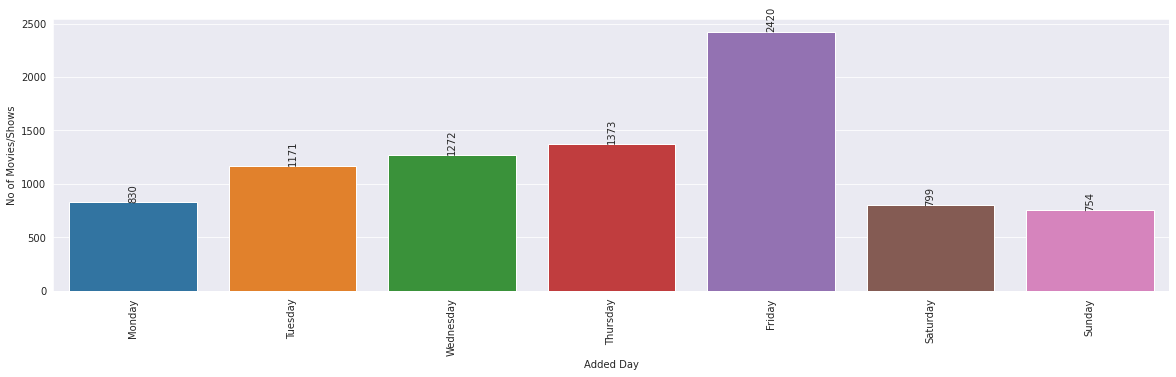

In [ ]:
countplot(data = data_to_explore, x = "added_day", size = (20, 5), rotation = True, order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], label = ("Added Day", "No of Movies/Shows"))

Above plot clearly shows that just before the weekends, which is Friday, most of the content was added to the platform for high viewership. 

# Bivariate Analysis

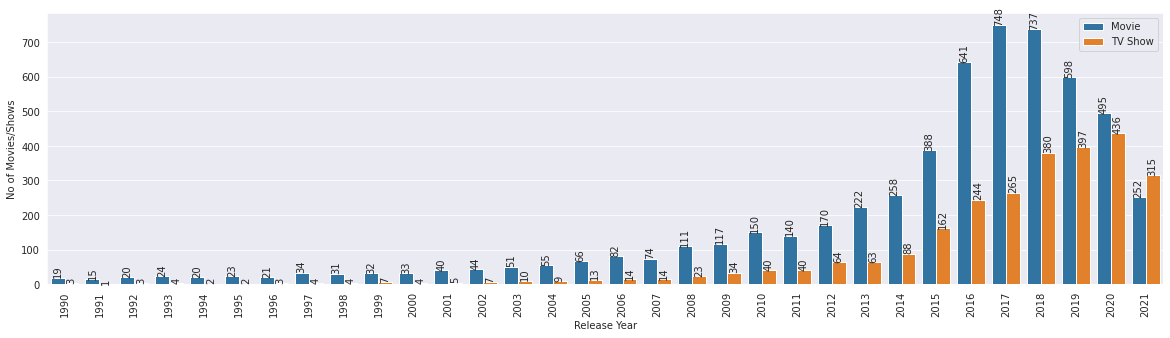

In [ ]:
barplot(data = data_to_explore[(data_to_explore['release_year'] >=1990) & (data_to_explore['release_year'] <= 2022)][["release_year", "type"]].groupby(["release_year", "type"]).agg(items = ("type", "count")).reset_index(), x = "release_year", y = "items", hue = "type", size = (20, 5), rotation = True, label = ("Release Year", "No of Movies/Shows"))

Above Plot shows last 30 years of release year data. we can clearly see that after year 2017 where number of movies per year went down, the number of TV shows have increased.

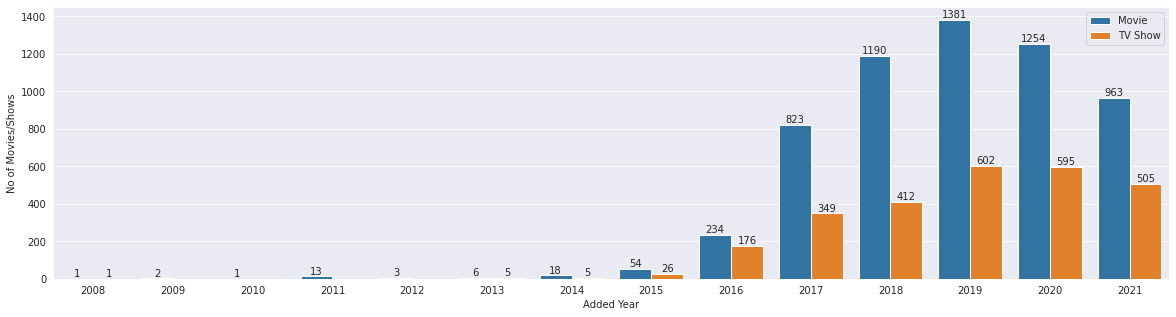

In [ ]:
countplot(data = data_to_explore, x = "added_year", hue = "type", size = (20, 5), label = ("Added Year", "No of Movies/Shows"))

In [ ]:
def bivariate_type(data, secondary, primary = "type", label = None):
  data = data_to_explore[[primary, "title"]].merge(data).groupby([secondary, primary]).agg(items = (primary, "count")).reset_index().sort_values(by = "items", ascending = False)[:20]
  barplot(data = data, x = secondary, y = "items", hue = primary, size = (20, 5), rotation = True, label = label)

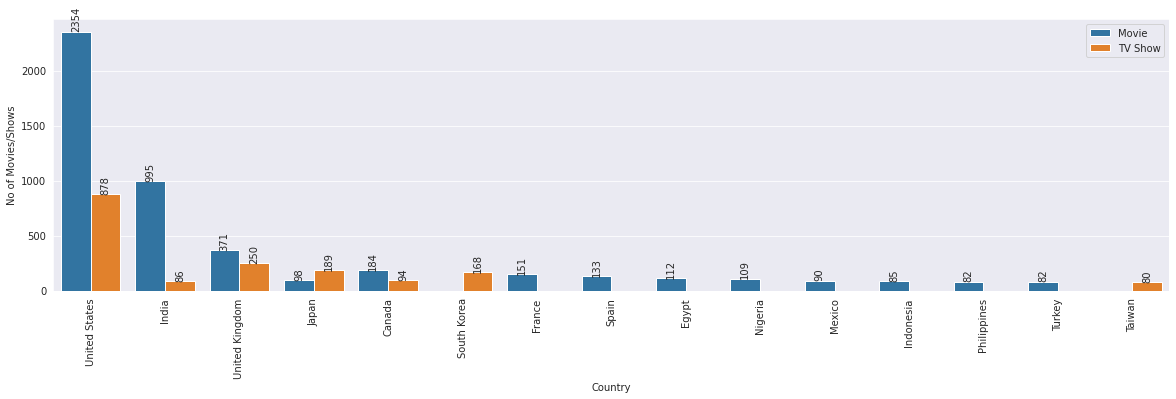

In [ ]:
bivariate_type(title_with_country, "country", label = ("Country", "No of Movies/Shows"))

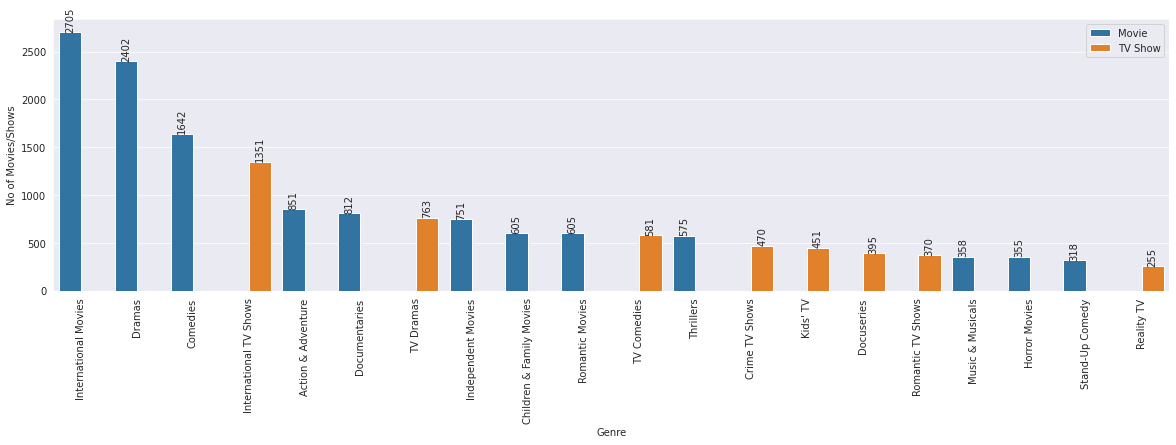

In [ ]:
bivariate_type(title_with_genre, "listed_in", label = ("Genre", "No of Movies/Shows"))

In [ ]:
def bivariate_director(data, secondary, primary = "director", label = None):
  data = title_with_director.merge(data).groupby([primary, secondary]).agg(items = (secondary, "count")).reset_index().sort_values(by = "items", ascending = False)[:30]
  data["pair"] = data[primary] + " | " + data[secondary].astype(str)
  barplot(data = data, x = "pair", y = "items", rotation = True, size = (20, 5), label = label)

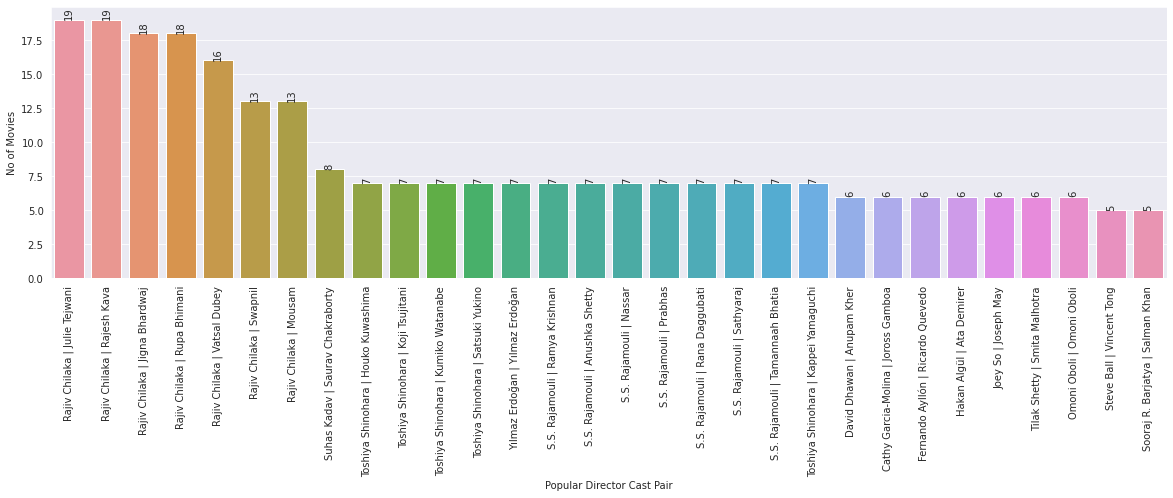

In [ ]:
bivariate_director(title_with_cast, "cast", label = ("Popular Director Cast Pair", "No of Movies"))

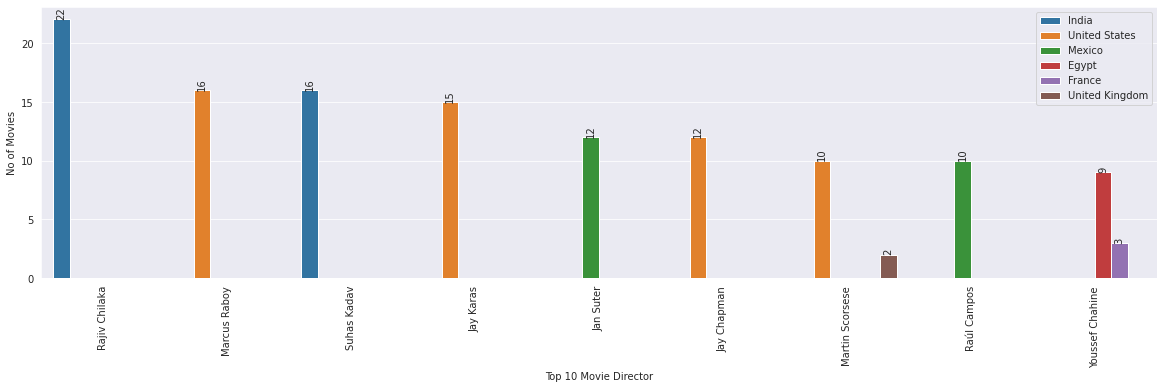

In [ ]:
data = top_directors.merge(top_country_movie, left_on="title", right_on="title").groupby(["director", "country"]).agg(count = ("title", "count")).reset_index().sort_values(by = ["count"], ascending = False).groupby(["director"]).head(2)
barplot(data = data, x = "director", y = "count", hue = "country", rotation = True, size = (20, 5), label = ("Top 10 Movie Director", "No of Movies"))

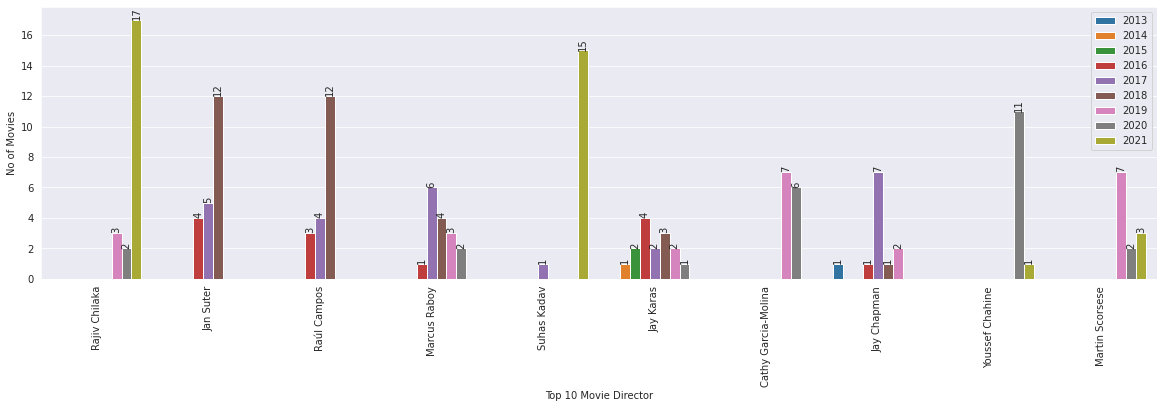

In [ ]:
data = top_directors.merge(data_to_explore.loc[data_to_explore["added_year"].isin(range(2012, 2022)), ["added_year", "title"]]).drop("count", axis = 1)
countplot(data = data, x = "director", hue = "added_year", rotation = True, size = (20, 5), label = ("Top 10 Movie Director", "No of Movies"))

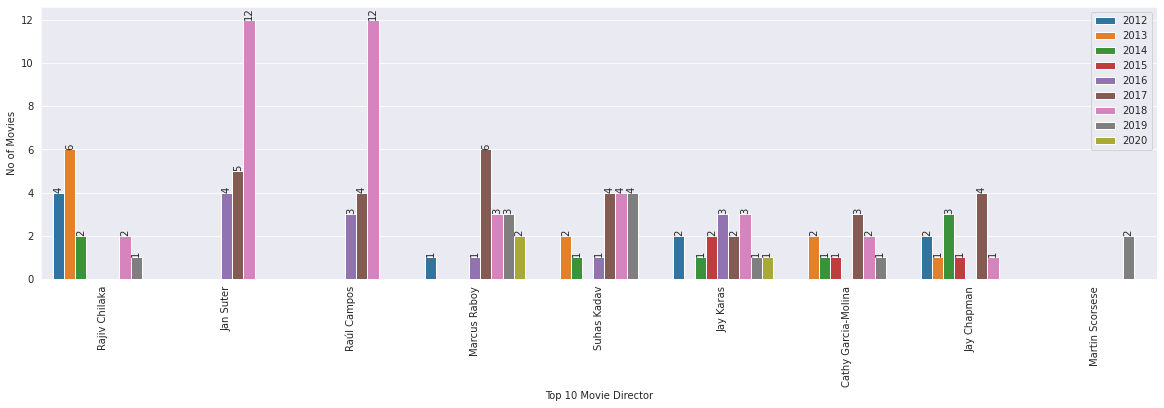

In [ ]:
data = top_directors.merge(data_to_explore.loc[data_to_explore["release_year"].isin(range(2012, 2022)), ["release_year", "title"]]).drop("count", axis = 1)
countplot(data = data, x = "director", hue = "release_year", rotation = True, size = (20, 5), label = ("Top 10 Movie Director", "No of Movies"))

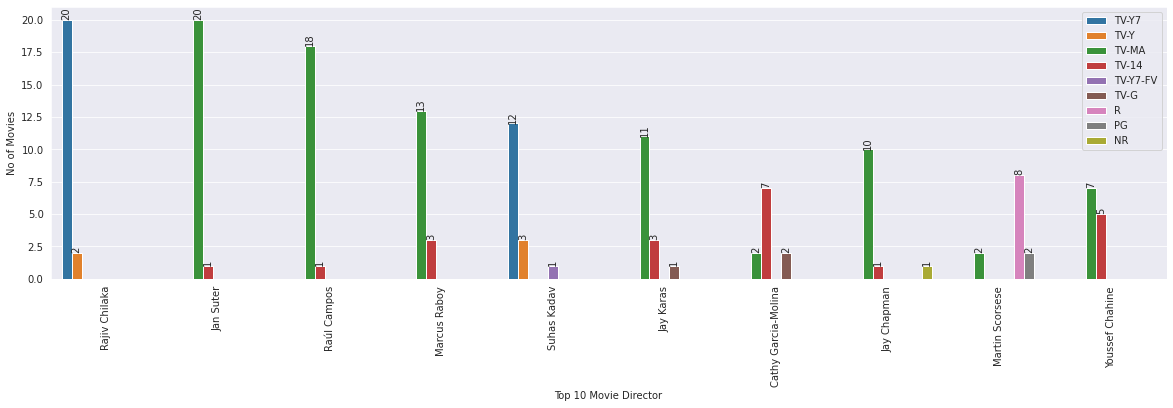

In [ ]:
data = top_directors.merge(data_to_explore[["rating", "title"]]).groupby(["director", "rating"]).agg(count = ("title", "count")).reset_index().merge(top_directors, left_on="director", right_on="director").drop("title", axis = 1).sort_values(by = ["count_y", "count_x"], ascending = False).drop_duplicates().groupby(["director"]).head(3)
barplot(data = data, x = "director", y = "count_x", hue = "rating", rotation = True, size = (20, 5), label = ("Top 10 Movie Director", "No of Movies"))

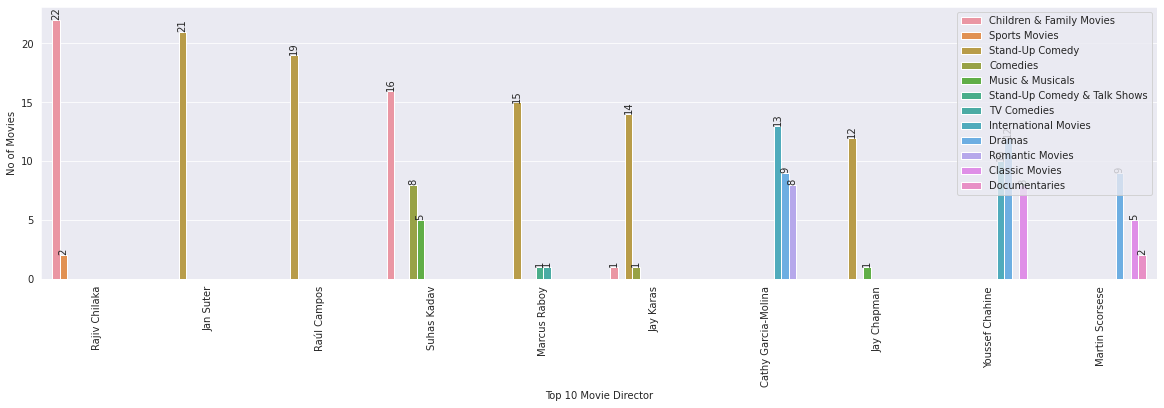

In [ ]:
data = top_directors.merge(title_with_genre).groupby(["director", "listed_in"]).agg(count = ("title", "count")).reset_index().merge(top_directors, left_on="director", right_on="director").drop("title", axis = 1).sort_values(by = ["count_y", "count_x"], ascending = False).drop_duplicates().groupby(["director"]).head(3)
barplot(data = data, x = "director", y = "count_x", hue = "listed_in", rotation = True, size = (20, 5), label = ("Top 10 Movie Director", "No of Movies"))

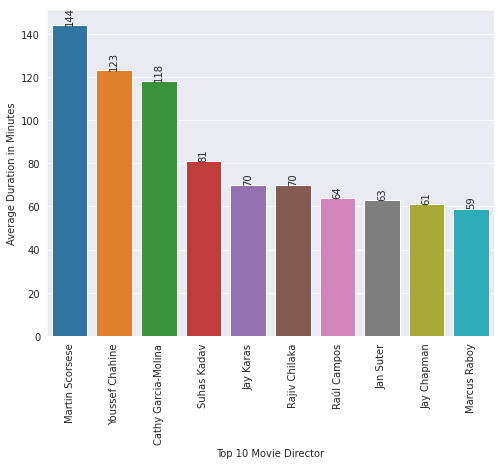

In [ ]:
data = top_directors.merge(data_to_explore[["title", "duration"]]).groupby(["director"]).agg(duration = ("duration", "mean")).astype("int").reset_index().sort_values(by = "duration", ascending = False)
barplot(data = data, x = "director", y = "duration", size = (8, 6), rotation = True, label = ("Top 10 Movie Director", "Average Duration in Minutes"))

In [ ]:
def bivariate_cast(data, secondary, primary = "cast", label = None):
  data = title_with_cast.merge(data).groupby([primary, secondary]).agg(items = (secondary, "count")).reset_index().sort_values(by = "items", ascending = False)[:30]
  data["pair"] = data[primary] + " | " + data[secondary].astype(str)
  barplot(data = data, x = "pair", y = "items", rotation = True, size = (20, 5), label = label)

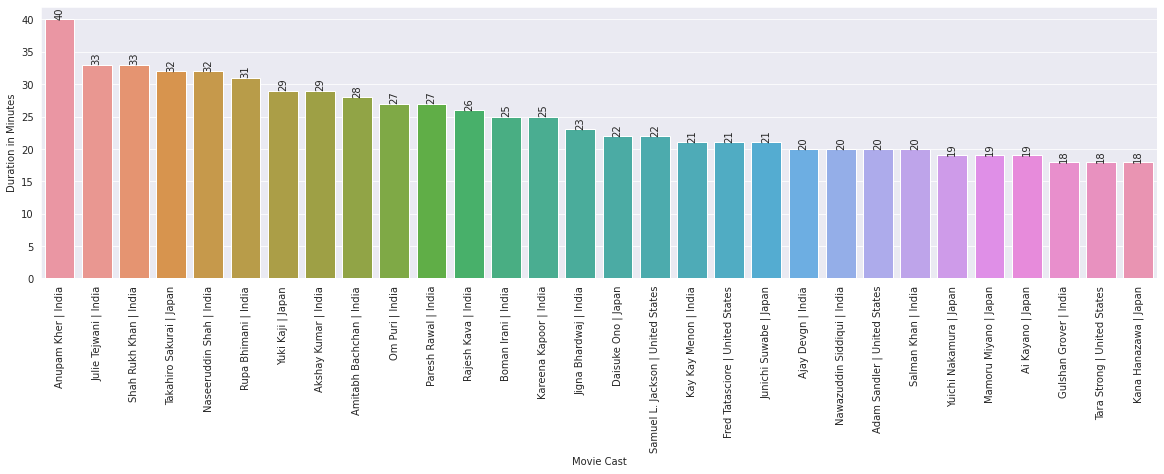

In [ ]:
bivariate_cast(title_with_country, "country", label = ("Movie Cast", "Duration in Minutes"))

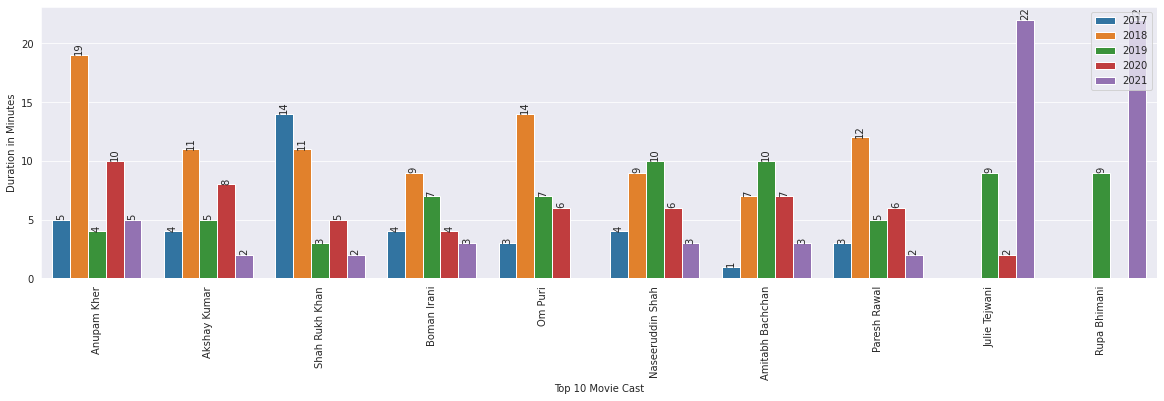

In [ ]:
data = top_cast_movie.merge(data_to_explore.loc[data_to_explore["added_year"].isin(range(2012, 2022)), ["added_year", "title"]]).drop("count", axis = 1)
countplot(data = data, x = "cast", hue = "added_year", rotation = True, size = (20, 5), label = ("Top 10 Movie Cast", "Duration in Minutes"))

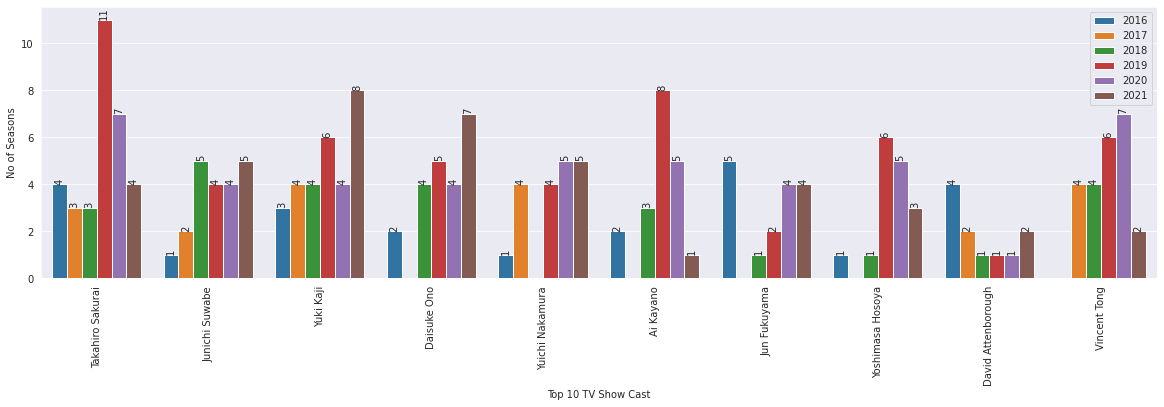

In [ ]:
data = top_cast_show.merge(data_to_explore.loc[data_to_explore["added_year"].isin(range(2016, 2022)), ["added_year", "title"]]).drop("count", axis = 1)
countplot(data = data, x = "cast", hue = "added_year", rotation = True, size = (20, 5), label = ("Top 10 TV Show Cast", "No of Seasons"))

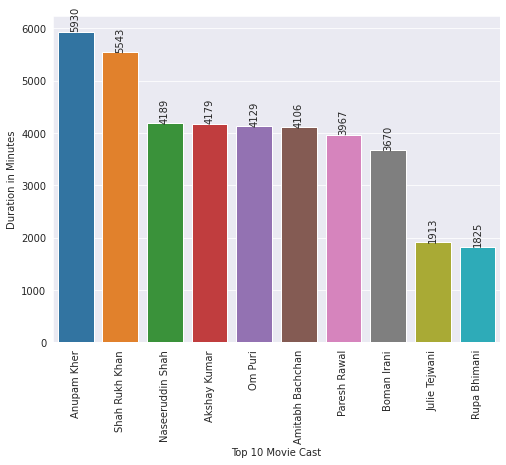

In [ ]:
data = top_cast_movie.merge(data_to_explore[["title", "duration"]]).groupby(["type", "cast"]).agg(duration = ("duration", "sum")).astype("int").reset_index().sort_values(by = "duration", ascending = False)
barplot(data = data, x = "cast", y = "duration", size = (8, 6), rotation = True, label = ("Top 10 Movie Cast", "Duration in Minutes"))

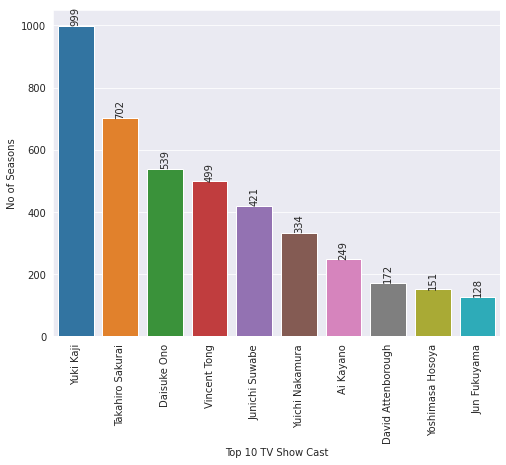

In [ ]:
data = top_cast_show.merge(data_to_explore[["title", "duration"]]).groupby(["type", "cast"]).agg(duration = ("duration", "sum")).astype("int").reset_index().sort_values(by = "duration", ascending = False)
barplot(data = data, x = "cast", y = "duration", size = (8, 6), rotation = True, label = ("Top 10 TV Show Cast", "No of Seasons"))

# Business Insights

From Above analysis, we have found that 


1.   USA & India are mostly large market of Netflix while UK, Japan, France, South Korea are emerging markets.

2.   In past 5-6 years where Movies added has gone down, TV shows added have increased continuously. 

3. Content added just before weekends(Friday) has been the highest for more viewership. While number of TV shows added throughout the year are constant, Movies added in Feb and May are low. 

4.  TV-MA & TV-14 rated content is watched the most on the platform while TV-PG, R, PG- 13 rated content has potential to Grow. 

5. Anupam Kher and SRK have appeared the most and been the favourite of the director. 

6. Most people prefer watching International Movies, Comedy, Drama, international TV shows. Action & Adventure, Documentary, Children & Family content, TV dramas are upcoming favourites. 

7. Anupam Kher and SRK appeared in most movies. Takahiro Sakurai appeared in most TV-shows. 

8. Rajiv Chilaka has been the Director who Directed the highest number of content on platform  and Rajesh Kava, Julie Tejwani, Rupa Bhimani, JIgna BHardwaj, Vatsal Dubey have been his favourite cast members. 

9.Rajiv Chilaka, Suhas Kadav, Jan Suter, Raui Campos, Youssef Chahine have been the topmost directors in past 5- 6 years. 

10. Jan Suter have directed highest number of content in 2018 which is mostly  TV- MA rated. Rajiv Chilaka have directed mostly TV- Y7 rated content. Raul Campos directed most content in 2018- are mostly TV-MA rated. 

11. Jan Suter, Raul Campos maily focus on stand-up Comedy, where Rajiv Chilaka mainly focuses on Children and family related content.










# Recommendations

1. Netflix should mostly focus on USA and India where people like to watch TV-MA, TV-14, TV-PG, R, PG-13 rated content. Stand-up Comedy and Children &family content have been the top choice of the subscribers. And people like to watch Anupam Kher and Srk the most.  But at the same time increase its market presence in UK, Japan, France, South Korea where people are mostly interested in international movies, comedy, drama, international TV- shows. 

2. Best Time to launch a Movie/ TV show is on Thursday or Friday. 

3. TV-MA, TV-14, TV-PG, R, PG-13 rated content should be added more. 

4. International Movies, Comedy, Drama, international TV shows should be topmost priority  and  Action & Adventure, Documentary, Children & Family content, TV dramas should be added more gradually. 

5. Movies added in Feb & May are low in numbers. So More movies can be added during these months. 

6. Adding more TV- shows has been priority in past 5-6 years while added movies number has gone down. Focus on adding more favourite Genre specific movies.
